## [Fashion-MNIST](https://pytorch.org/docs/stable/torchvision/datasets.html#fashion-mnist)

In [1]:
import os
import random
import numpy as np
import torch
import torchvision

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [3]:
dataset = torchvision.datasets.FashionMNIST('./data', download=True)

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
print(type(dataset))

# tuple: (image, target)

torchvision.datasets.mnist.FashionMNIST


In [5]:
print(len(dataset))

60000


In [6]:
n = 200
data, target = dataset[n]

In [7]:
print(type(data))

<class 'PIL.Image.Image'>


In [8]:
print(data.mode, data.width, data.height)

L 28 28


In [9]:
print(type(target))

<class 'int'>


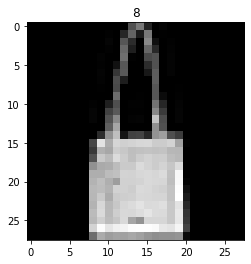

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title(target)
plt.imshow(data, cmap='gray')
data.show()

In [11]:
import torchvision.transforms as transforms
# batch must contain tensors, numpy arrays, numbers, dicts or lists
ToTensor = transforms.Compose([
    transforms.ToTensor()
])
dataset = torchvision.datasets.FashionMNIST('./data', transform = ToTensor)

In [12]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=1,
                                          shuffle=True)

torch.Size([1, 1, 28, 28])
torch.Size([28, 28])


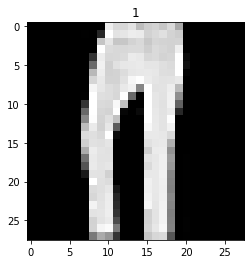

In [13]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    print(data.shape)
    data = data.squeeze() 
    data = data.squeeze() 
    print(data.shape)
    pic = ToPILImage(data)
    plt.title(int(target))
    plt.imshow(pic, cmap='gray')
    plt.show()
    break

In [14]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=10,
                                          shuffle=True)

torch.Size([10, 1, 28, 28])
torch.Size([1, 28, 28])


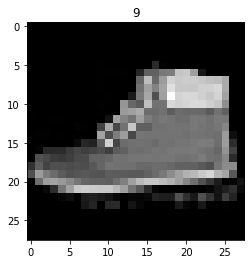

In [15]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    index = 5
    print(data.shape)
    img = data[index]
    print(img.shape)
    pic = ToPILImage(img)
    plt.title(int(target[index]))
    plt.imshow(pic, cmap='gray')
    plt.show()
    break

In [16]:
# 1000개 batch
n = 1000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 2000개 batch
n = 2000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 999개 batch
n = 999
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))

print(l)
print('Total number of data: {}'.format(i))

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
Total number of data: 60000
[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]
Total number of data: 60000
[999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 60]
Total number of data: 60000


In [17]:
%matplotlib inline

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.utils as utils
import torchvision.transforms as transforms

is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

In [18]:
import torchvision.transforms as transforms
compose_train = transforms.Compose([
                      transforms.ToTensor(),
                      transforms.Normalize(mean=(0.5), std=(0.5))
                      ])
compose_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5))
])


train_data = torchvision.datasets.FashionMNIST(root='./data/', train='True', transform=compose_train, download=True)
test_data  = torchvision.datasets.FashionMNIST(root='./data/', train='False', transform=compose_test, download=True)

In [19]:
print('train sets: {}'.format(len(train_data)))
print('test sets: {}'.format(len(test_data)))

train sets: 60000
test sets: 60000


In [20]:
BATCH_SIZE = 10

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [21]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers) # container unpacking

In [22]:
class FashionMNISTModel(nn.Module):
    def __init__(self, output_size):
        super(FashionMNISTModel, self).__init__()

        self.output_size = output_size
        self.conv1 = conv_block(1, 32) 
        self.conv2 = conv_block(32, 64, pool=True) # (14, 14)
        self.res1 = nn.Sequential(conv_block(64, 64), conv_block(64, 64))
        self.conv3 = conv_block(64, 128, pool=True) # (7, 7)
        self.conv4 = conv_block(128, 256, pool=True) # (3, 3)
        self.res2 = nn.Sequential(conv_block(256, 256), conv_block(256, 256))

        self.fc = nn.Sequential(nn.MaxPool2d(2), 
                                        nn.Flatten(), 
                                        nn.Linear(256, self.output_size))
        

    def forward(self, x):
        output = self.conv1(x)
        output = self.conv2(output)
        output = self.res1(output) + output
        output = self.conv3(output)
        output = self.conv4(output)
        output = self.res2(output) + output
        output = self.fc(output)
        value = torch.max(output, 1)[1]

        return output, value        


In [23]:
model = FashionMNISTModel(10).to(device)

In [24]:
n = 0
for data, target in train_loader:
    print(data.shape) # (batch, channel, width, height)
    break

data = data.to(device)

with torch.no_grad():
    y, _ = model(data)
    print(y)
    print(np.argmax(y.cpu(), axis=1), target)

torch.Size([10, 1, 28, 28])
tensor([[ 0.1976,  0.2646,  0.9500, -1.4081,  0.4816,  1.6723,  1.4147, -1.3561,
         -0.1651, -0.7602],
        [ 2.4991, -0.2863,  0.7922, -1.9143,  0.5059,  1.6725,  2.0802, -2.0202,
         -0.8578, -1.6151],
        [ 2.7662, -0.2663,  0.4891, -1.7789,  0.3563,  1.0068,  1.2866, -1.7667,
         -0.1836, -0.6660],
        [ 0.5175,  0.8691,  0.3849, -1.1071, -0.1181,  1.6654,  1.0684, -2.2434,
         -0.0662, -0.9983],
        [ 2.8528,  0.9861,  0.4570, -1.8281,  0.2957, -0.1228,  1.2736, -1.6960,
         -0.2045, -0.8905],
        [ 2.3441,  0.2537,  0.6972, -2.2443,  0.3965,  0.7208,  1.4982, -1.0300,
          0.1051, -0.8113],
        [ 1.8844, -0.0076,  1.0238, -1.9193,  0.2327,  0.7940,  1.4751, -1.2299,
         -0.0433, -1.1618],
        [ 0.9820, -0.1038,  0.4403, -1.8074,  1.1829,  2.3531,  1.2698, -2.6566,
         -0.7753, -1.1371],
        [ 1.9895,  0.2752,  1.1382, -1.1821,  0.2170,  0.6151,  1.6439, -2.0487,
          0.0094, -

In [25]:
BATCH_SIZE = 1000

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [26]:
model = FashionMNISTModel(10).to(device) 
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss().to(device)

n_epochs = 10 # 10회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    n_train = 0
    train_loss = 0
    model.train()
    for train_data, train_target in train_loader:
        train_data = train_data.to(device)
        train_target = train_target.to(device)
        y, _ = model(train_data)
        loss = criterion(y, train_target).sum()
        train_loss += loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        n_train += 1
        del train_data
        del train_target

    model.eval()
    n_test = 0
    test_loss = 0
    correct = 0
    total = 0
    for test_data, test_target in test_loader:
        test_data = test_data.to(device)
        test_target = test_target.to(device)
        y_pred, idx_pred = model(test_data)
        del test_data
        loss = criterion(y_pred, test_target).sum()
        test_loss += loss.data.cpu().numpy()
        n_test += 1
        total += len(test_target)
        correct += (idx_pred == test_target).sum()

    accuracy = correct * 100 / total
    print('epoch {}th training loss: {} test loss: {}, accuracy: {}'.format(
            epoch + 1, train_loss / n_train, test_loss / n_test,
            accuracy
        ))
    list_training_loss.append(train_loss / n_train)
    list_test_loss.append(test_loss / n_test)

epoch 1th training loss: 1.4016771843036016 test loss: 0.7551689634720484, accuracy: 72.05500030517578
epoch 2th training loss: 0.5078929662704468 test loss: 0.8459734261035919, accuracy: 67.19667053222656
epoch 3th training loss: 0.3675916353861491 test loss: 0.4229019537568092, accuracy: 85.27833557128906
epoch 4th training loss: 0.2986327650646369 test loss: 0.38437588115533194, accuracy: 85.69499969482422
epoch 5th training loss: 0.26281886647144953 test loss: 0.30360113084316254, accuracy: 89.07500457763672
epoch 6th training loss: 0.22995956713954607 test loss: 0.2440723031759262, accuracy: 91.04000091552734
epoch 7th training loss: 0.2114946556588014 test loss: 0.45217308551073077, accuracy: 84.09000396728516
epoch 8th training loss: 0.19180865262945493 test loss: 0.5089057967066765, accuracy: 84.97000122070312
epoch 9th training loss: 0.1680330593138933 test loss: 0.1673567848900954, accuracy: 94.15666961669922
epoch 10th training loss: 0.15502084841330846 test loss: 0.14105915

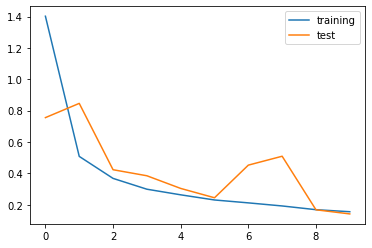

In [27]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()